In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.optimize import curve_fit

reps = 2000
sweep_time = 250
swap_freq= -.0195
swap_time=0.5*6/abs(swap_freq)
J = 35
num_steps=51
tomography = 'y'
y_ph_list = np.linspace(15,85,41) 

C:\Users\quantum1\AppData\Local\Temp\ipykernel_25048\884994061.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


Text(0.5, 1.0, 'Probability of states for y_ph = 65.75')

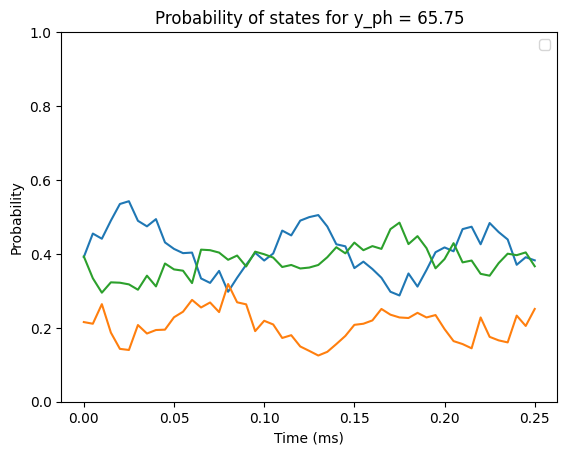

In [27]:
phase = 65.75
y_ph_list = np.linspace(15,85,41) 
data= pd.read_csv(f'df_prob_y_ph_{phase}.csv')
plt.plot(dpi = 150)
sns.lineplot(data=data, x='time', y='P_f')
sns.lineplot(data=data, x='time', y='P_e')
sns.lineplot(data=data, x='time', y='P_g')
plt.xlabel('Time (ms)')
plt.ylabel('Probability')
plt.legend()
plt.ylim(0,1)
plt.title(f'Probability of states for y_ph = {phase}')

In [25]:

# Define the sine function to fit
def sine_function(x, A, phi, offset):
    return A * np.sin(2 * np.pi * x + phi) + offset

# Define the list of y_ph values
y_ph_list = np.linspace(15, 85, 41)

# Initialize lists to store amplitudes and phases
amplitudes_f = []
amplitudes_e = []
phases = []

# Loop through each y_ph value
for y_ph in y_ph_list:
    # Construct the filename
    filename = f'df_prob_y_ph_{y_ph}.csv'
    
    # Check if the file exists
    if not os.path.exists(filename):
        print(f"File not found for y_ph = {y_ph}, skipping...")
        continue
    
    # Read the CSV file
    data = pd.read_csv(filename)
    
    # Extract time and normalized probabilities
    time = data['time']
    P_f_normalized = data['P_f_normalized']
    P_e_normalized = data['P_e_normalized']
    
    # Fit P_f_normalized to a sine function
    try:
        popt_f, _ = curve_fit(sine_function, time, P_f_normalized, p0=[0.5, 0, 0.5])
        amplitude_f = popt_f[0]  # Extract amplitude
    except RuntimeError:
        print(f"Failed to fit P_f_normalized for y_ph = {y_ph}")
        amplitude_f = np.nan  # Use NaN if fitting fails
    
    # Fit P_e_normalized to a sine function
    try:
        popt_e, _ = curve_fit(sine_function, time, P_e_normalized, p0=[0.5, 0, 0.5])
        amplitude_e = popt_e[0]  # Extract amplitude
    except RuntimeError:
        print(f"Failed to fit P_e_normalized for y_ph = {y_ph}")
        amplitude_e = np.nan  # Use NaN if fitting fails
    
    # Store the results
    amplitudes_f.append(amplitude_f)
    amplitudes_e.append(amplitude_e)
    phases.append(y_ph)

    print(f"Processed y_ph = {y_ph}: P_f amplitude = {amplitude_f}, P_e amplitude = {amplitude_e}")

# Create a DataFrame to store amplitudes vs phase
results = pd.DataFrame({
    'y_ph': phases,
    'P_f_amplitude': amplitudes_f,
    'P_e_amplitude': amplitudes_e
})

# Save the results to a CSV file
results.to_csv('amplitudes_vs_phase.csv', index=False)
print("Amplitudes vs phase saved to 'amplitudes_vs_phase.csv'")

Processed y_ph = 15.0: P_f amplitude = -0.18022083855568857, P_e amplitude = 0.18022086653513916
Processed y_ph = 16.75: P_f amplitude = -0.20399434154156573, P_e amplitude = 0.2039943308046651
Processed y_ph = 18.5: P_f amplitude = -0.20241983154487136, P_e amplitude = 0.20241984651352443
Processed y_ph = 20.25: P_f amplitude = -0.239590590703267, P_e amplitude = 0.23959054764275978
Processed y_ph = 22.0: P_f amplitude = -0.17730666463225753, P_e amplitude = 0.1773066514578813
Processed y_ph = 23.75: P_f amplitude = -0.18072997434026977, P_e amplitude = 0.1807299464782357
Processed y_ph = 25.5: P_f amplitude = -0.16798510906495154, P_e amplitude = 0.16798508532415501
Processed y_ph = 27.25: P_f amplitude = -0.15962503571402303, P_e amplitude = 0.15962500894048082
Processed y_ph = 29.0: P_f amplitude = -0.20026550379455502, P_e amplitude = 0.20026551623890357
Processed y_ph = 30.75: P_f amplitude = -0.15042556387527092, P_e amplitude = 0.15042559806619527
Processed y_ph = 32.5: P_f amp

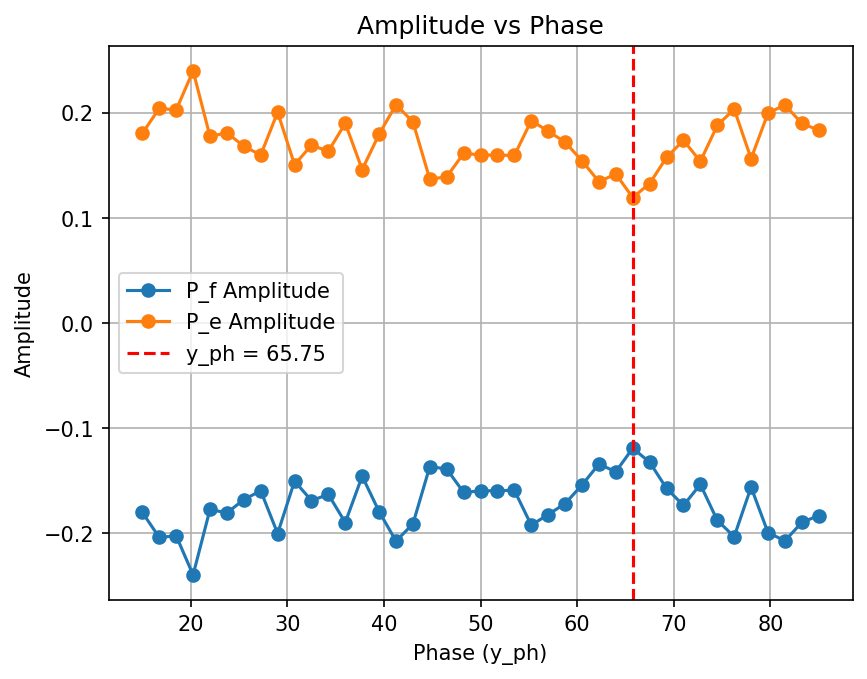

In [26]:
# Plot the results
plt.figure(dpi=150)
plt.plot(results['y_ph'], results['P_f_amplitude'], 'o-', label='P_f Amplitude')
plt.plot(results['y_ph'], results['P_e_amplitude'], 'o-', label='P_e Amplitude')
plt.axvline(phases[np.argmin(np.abs(amplitudes_f))], color='r', linestyle='--', label=f'y_ph = {phases[np.argmin(np.abs(amplitudes_f))]}')
plt.xlabel('Phase (y_ph)')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Amplitude vs Phase')
plt.grid()
plt.show()